In [1]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy import save
# created by L.M.
import benefit_cost_ratio as bcr

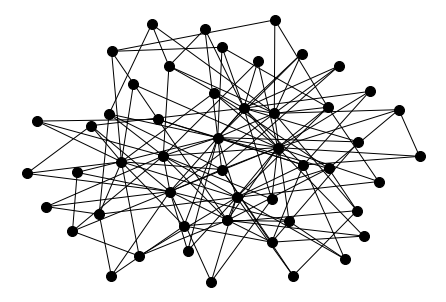

In [2]:
G = nx.barabasi_albert_graph(50, 3, seed=0)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_color = 'k', node_size = 100)

In [3]:
n = G.number_of_nodes()

In [ ]:
Save_add = []

for i0 in range(0, n-1):
    for j0 in range(i0+1, n):
        # we need change the sentence below!
        G = nx.barabasi_albert_graph(50, 3, seed=0)
        output = []
        if i0 not in G.neighbors(j0):
            for epsilon in np.linspace(0, 1, 51):
                G.add_edge(i0, j0, weight = epsilon)
                output.append(bcr.bcr(G))
            x = np.linspace(0, 1, 51)
            y = np.asarray(output)
            Save_add.append(y-y[0])     # new sentence here for save
            plt.plot(x, y-y[0])
            
save('curve plot add an edge - BA', np.asarray(Save_add))
plt.xlim(0, 1.0)
plt.savefig("BA-positive", dpi=300)
plt.show()

In [ ]:
Save_remove = []

# we need change the sentence below!
G = nx.barabasi_albert_graph(50, 3, seed=0)

Edgelist = list(G.edges())

for edge in Edgelist:
    output = []
    G.remove_edge(edge[0], edge[1])
    if nx.is_connected(G):
        for epsilon in np.linspace(0, 1, 51):
            G.add_edge(edge[0], edge[1], weight = epsilon)
            output.append(bcr.bcr(G))
        x = np.linspace(-1, 0, 51)
        y = np.asarray(output)
        Save_remove.append(y-y[len(x)-1])     # new sentence here for save
        plt.plot(x, y-y[len(x)-1])
    else:
        G.add_edge(edge[0], edge[1])
        
save('curve plot remove an edge - BA', np.asarray(Save_remove))
plt.xlim(-1, 0)
plt.savefig("BA-negative", dpi=300)
plt.show()